In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm
import pathlib
from PIL import Image
import datetime
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.layers import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.imagenet_utils import decode_predictions
import numpy as np
from tensorflow.keras.applications import (
        vgg16,
        resnet50,
        mobilenet,
        inception_v3
    )
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import decomposition
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sys
import os
from sklearn.cluster import KMeans

In [8]:
pip install colorthief

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
device_name = tensorflow.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [10]:
# image dataset folders
train_dir_path = '/content/drive/MyDrive/ZAD3/train'
test_dir_path = '/content/drive/MyDrive/ZAD3/test'
valid_dir_path = '/content/drive/MyDrive/ZAD3/valid'

# image dimensions
width = 128
height = 128
# channels = 3 # RGB
batch = 32
data_dir = pathlib.Path(train_dir_path)
test_dir = pathlib.Path(test_dir_path)
valid_dir = pathlib.Path(valid_dir_path)

In [11]:
train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = "categorical",
    color_mode = "rgb",
    batch_size=batch,
    image_size=(width, height),
    shuffle=True,
    seed=1337,
    validation_split=None
)

Found 13832 files belonging to 100 classes.


In [12]:
val_ds = keras.utils.image_dataset_from_directory(
    valid_dir,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch,
    image_size=(width, height),
    shuffle=True,
    seed=1337,
    validation_split=None
)

Found 500 files belonging to 100 classes.


In [13]:
test_ds = keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred", 
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch,
    image_size=(width, height),
    shuffle=False,
    seed=None,
    validation_split=None
)

Found 540 files belonging to 100 classes.


35363/35363 [==============================] - 0s 0us/step


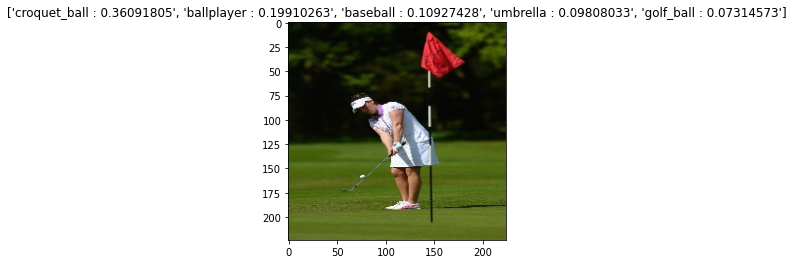

1/1 [==============================] - 0s 17ms/step


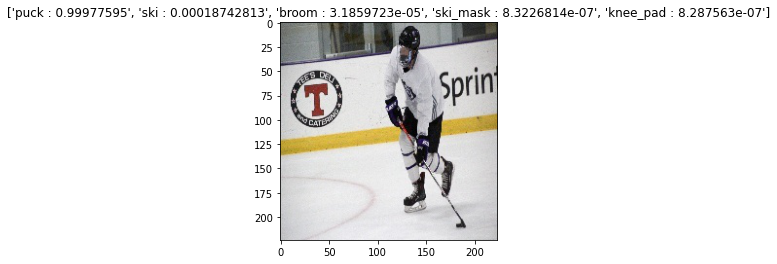

1/1 [==============================] - 0s 17ms/step


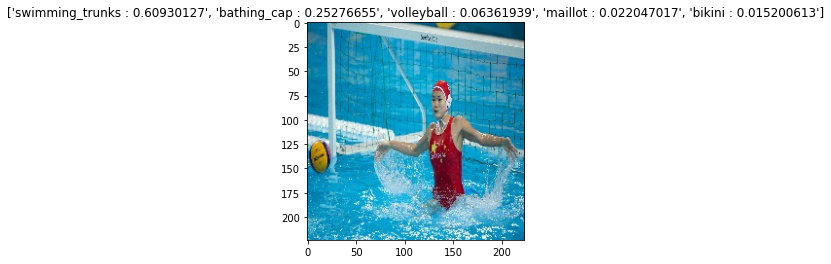

1/1 [==============================] - 0s 19ms/step


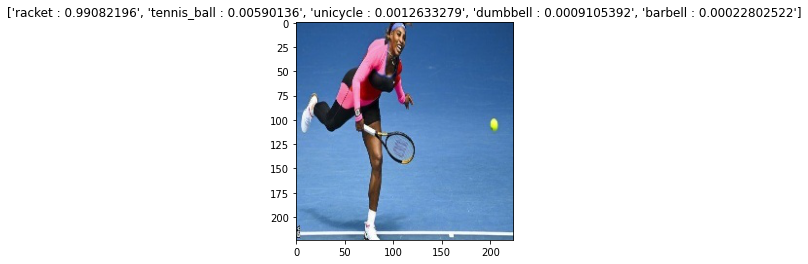

1/1 [==============================] - 0s 17ms/step


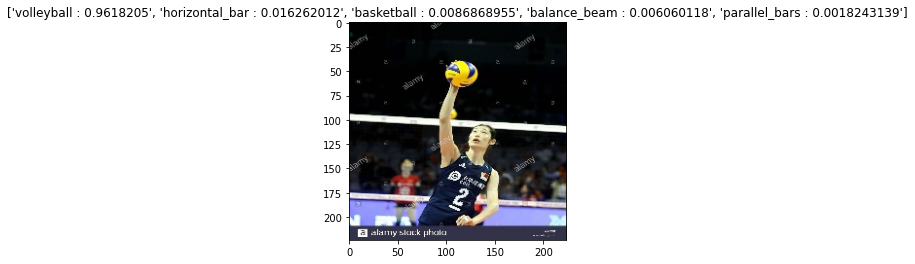

In [14]:
# https://learnopencv.com/keras-tutorial-using-pre-trained-imagenet-models/
 
# init the models
vgg_model = vgg16.VGG16(weights='imagenet')

# assign the image path for the classification experiments
filenames = ['golf.jpg','hockey.jpg','polo.jpg','tenis.jpg','volley.jpg']

for name in filenames: 
  # load an image in PIL format
  original = load_img( '/content/drive/MyDrive/ZAD3/test_sports/'+name, target_size=(224, 224))
  
  numpy_image = img_to_array(original)
  
  image_batch = np.expand_dims(numpy_image, axis=0)

  processed_image = vgg16.preprocess_input(image_batch.copy())
  
  predictions = vgg_model.predict(processed_image)
  label_vgg = decode_predictions(predictions)
  labels = []
  for prediction_id in range(len(label_vgg[0])):
      labels.append(str(label_vgg[0][prediction_id][1])+' : '+str(label_vgg[0][prediction_id][2]))
  plt.imshow(original)
  plt.title(labels)
  plt.show()

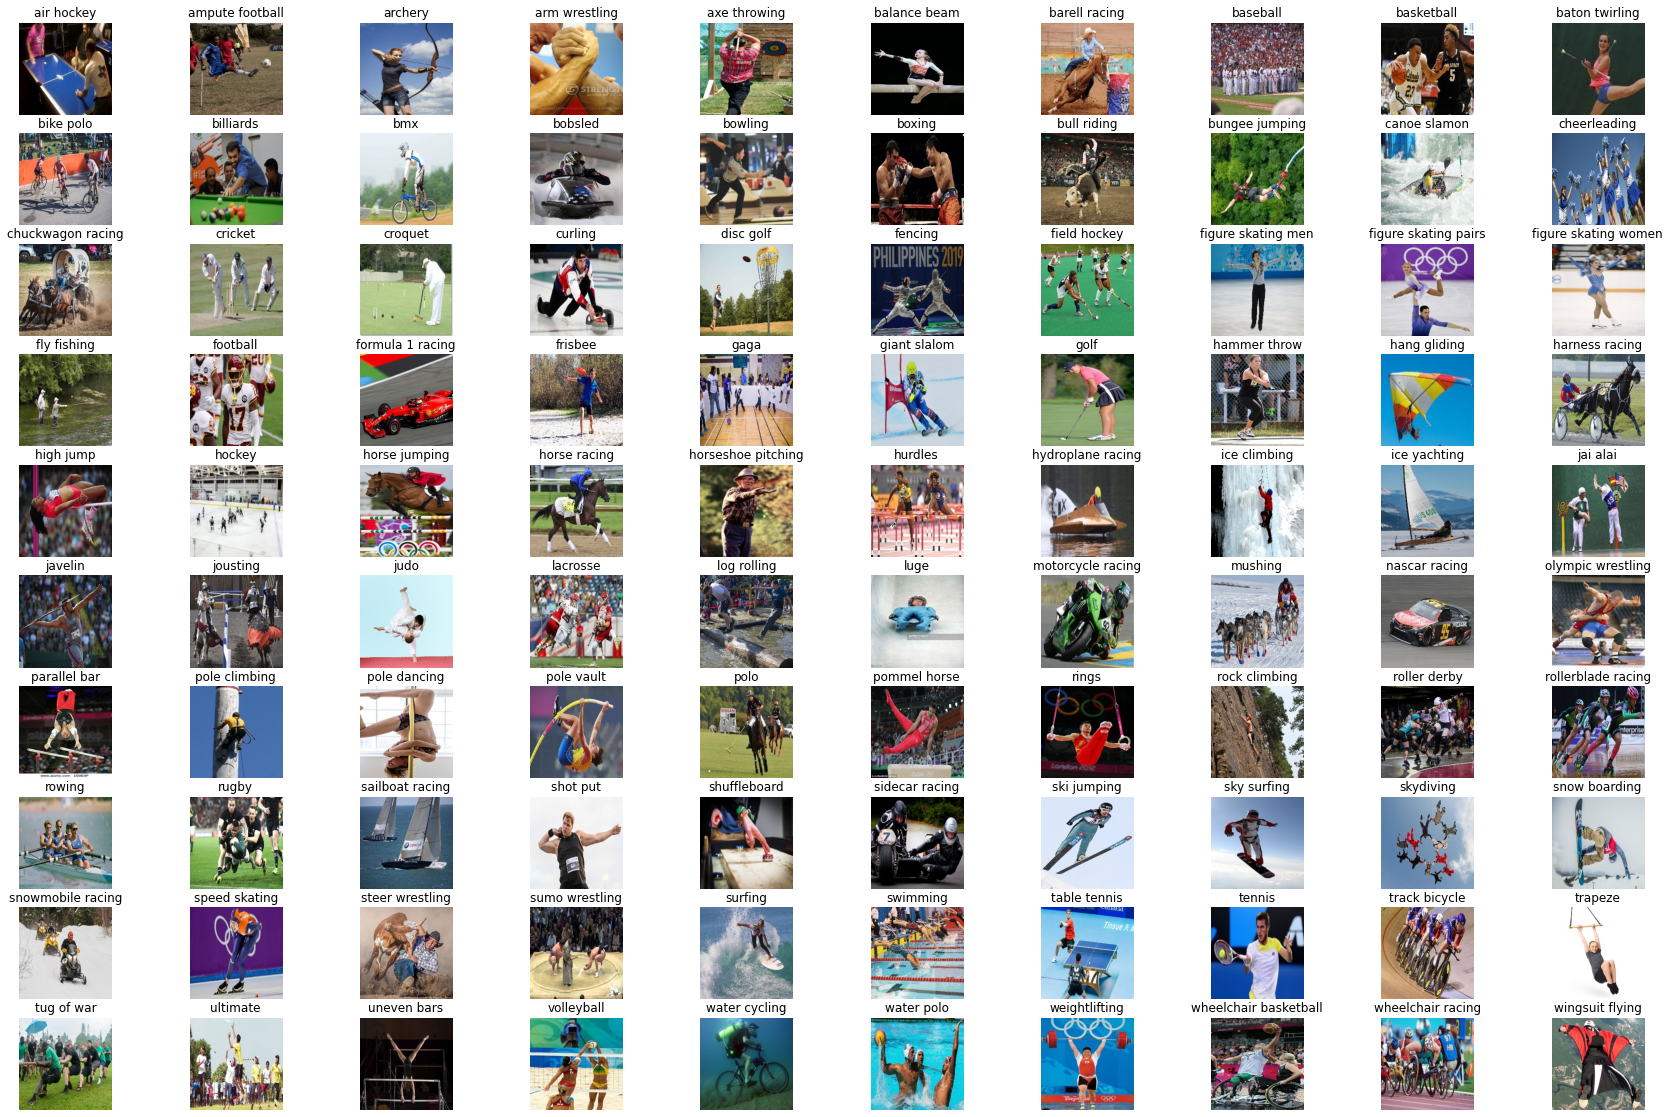

In [15]:
sportFoldersNames = []
sportFoldersSizes = []
class_names = sorted(os.listdir(train_dir_path))
plt.figure(figsize=(30, 20))
for i, name in enumerate(class_names):
    ax = plt.subplot(10, 10, i + 1)
    sportFoldersNames.append(name)
    size = len(os.listdir(train_dir_path+"/"+name))
    sportFoldersSizes.append(size)
    # print(dominantColorInClass(test_dir_path,name,size))
    # plt.imshow(dominantColorInClass(test_dir_path,name,size))
    plt.imshow(np.asarray(Image.open(test_dir_path+"/"+name+"/"+os.listdir(test_dir_path+"/"+name)[0])))
    # plt.imshow(np.asarray(Image.open(train_dir_path+"/"+name+"/"+os.listdir(train_dir_path+"/"+name)[0])))
    plt.title(name)
    plt.axis("off")

In [16]:
# pip install colorthief

In [17]:
# from colorthief import ColorThief

# def most_frequent(List):
#     counter = 0
#     num = List[0]
     
#     for i in List:
#         curr_frequency = List.count(i)
#         if(curr_frequency> counter):
#             counter = curr_frequency
#             num = i
 
#     return num

# def dominantColorInClass(dir,name,size):
#   dominant_colors=[]
#   for i in range(5):
#     color_thief = ColorThief(dir+"/"+name+"/"+str(i+1)+".jpg")
#     dominant_color = color_thief.get_color(quality=1)
#     dominant_colors.append(dominant_color)
#   return most_frequent(dominant_colors)

# plt.figure(figsize=(30, 20))
# for i, name in enumerate(class_names):
#     ax = plt.subplot(10, 10, i + 1)
#     plt.imshow([[dominantColorInClass(test_dir_path,name,size)]])
#     plt.title(name)
#     plt.axis("off")

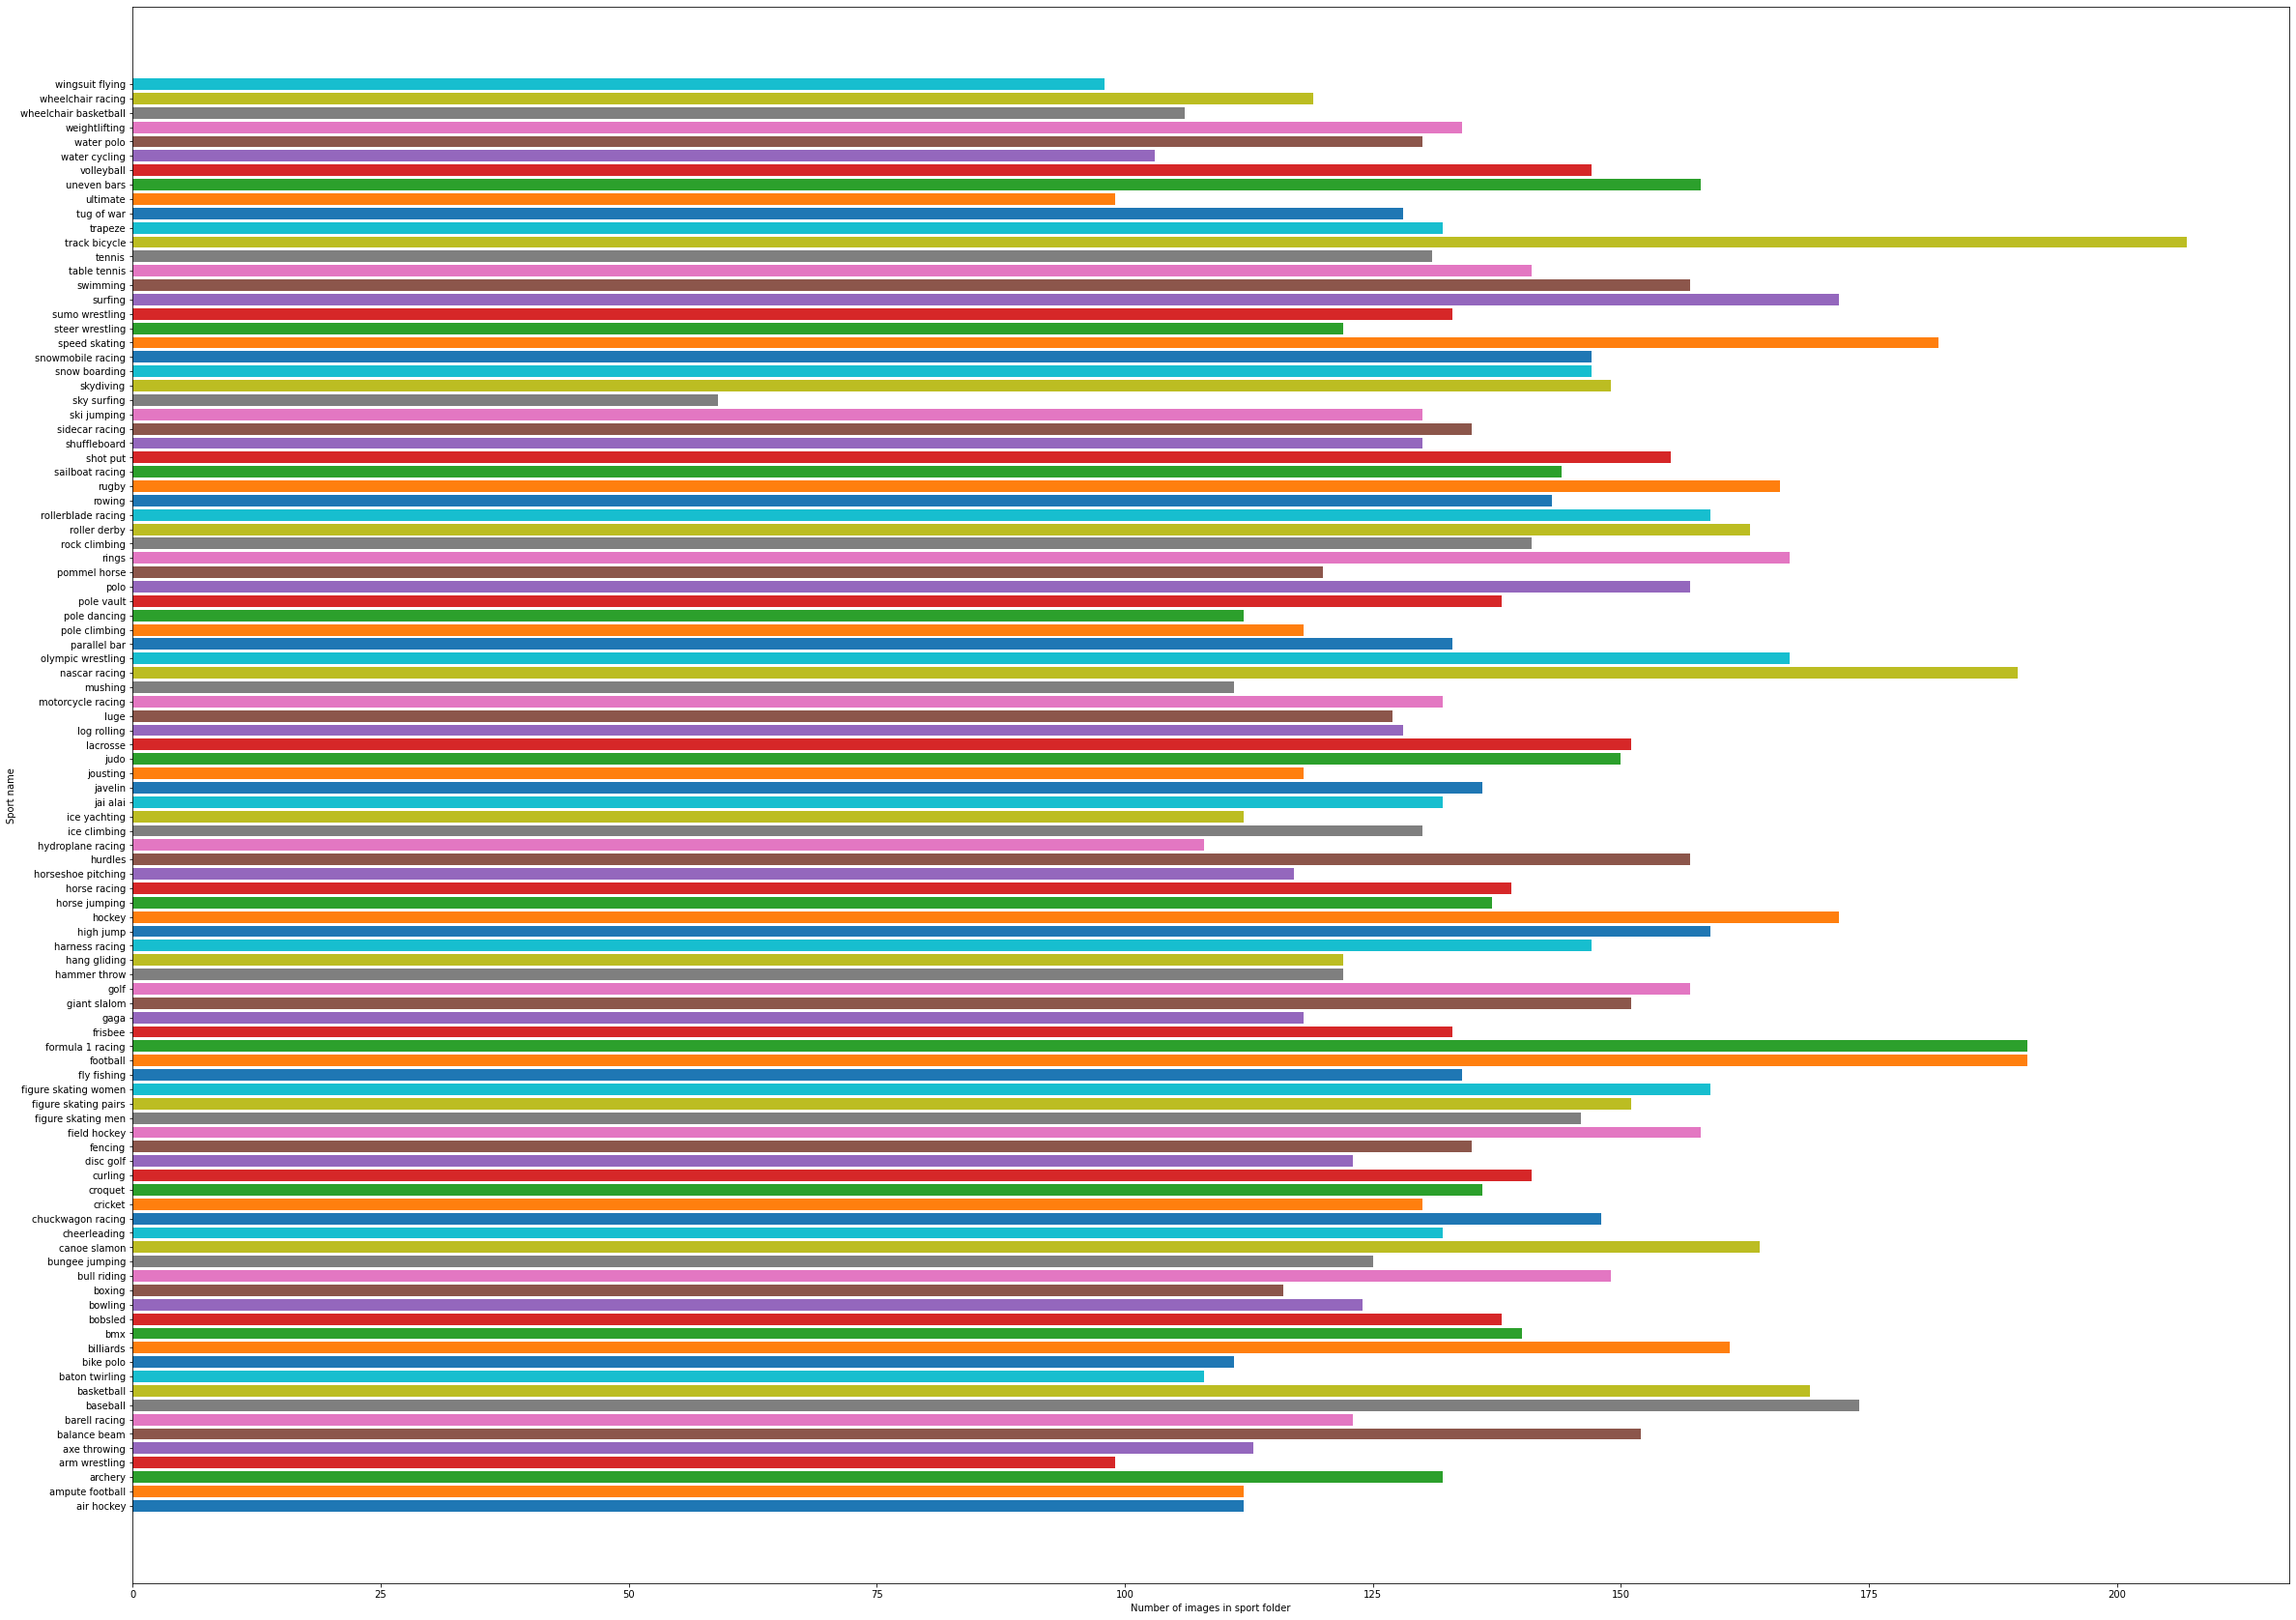

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure(figsize=(40, 30))
plt.barh(sportFoldersNames,sportFoldersSizes,color = colors)
plt.xlabel("Number of images in sport folder")
plt.ylabel("Sport name")
plt.show()

In [19]:
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip('horizontal'),
  keras.layers.RandomRotation(0.2),
  keras.layers.RandomZoom(.5, .2)
])

<MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100), dtype=tf.float32, name=None))>


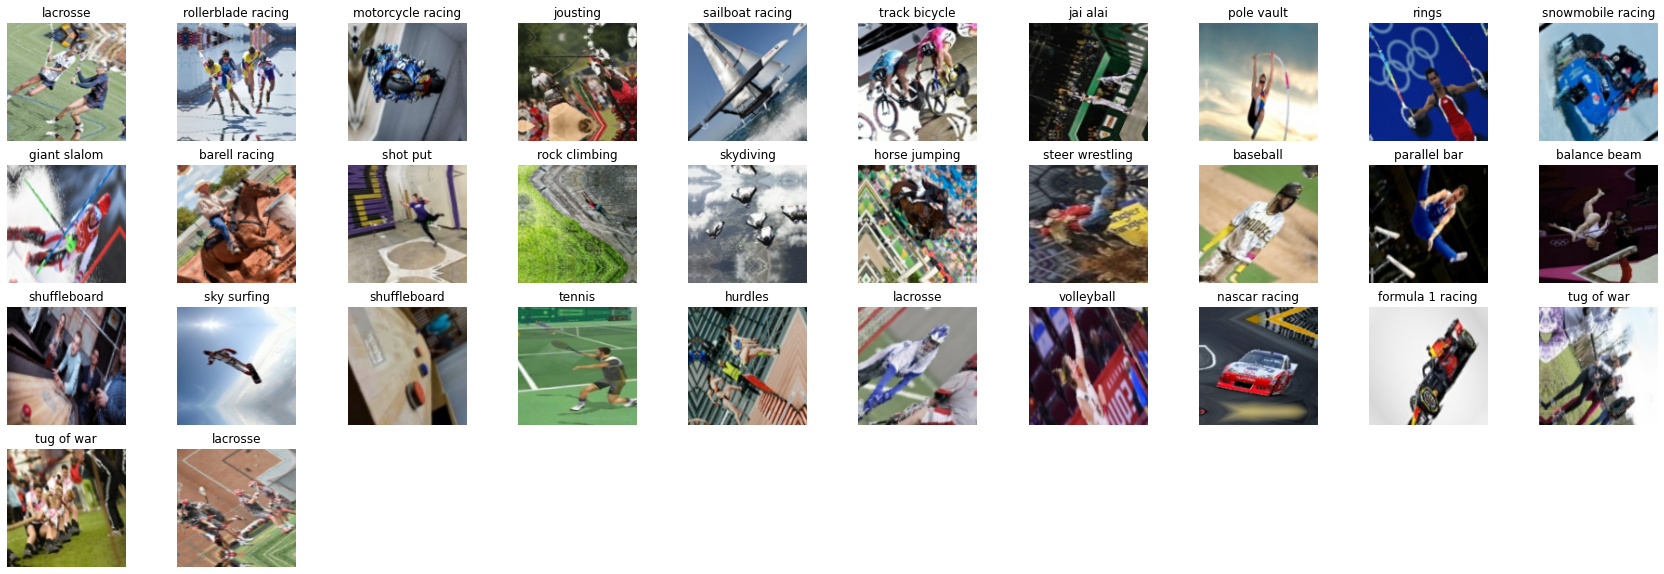

In [20]:
train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
val_ds = val_ds.map(lambda x, y: (data_augmentation(x), y))
print(train_ds)

image_batch, labels_batch = next(iter(train_ds))
plt.figure(figsize=(30, 10))
for i, (image, label) in enumerate(zip(image_batch, labels_batch)):
    ax = plt.subplot(4, 10, i + 1)
    plt.imshow(np.array(image).astype(int))
    plt.title(class_names[label.numpy().argmax()])
    plt.axis("off")

In [21]:
# normalization_layer = keras.layers.Rescaling(1./255)

In [22]:
# train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(train_ds))

# # confirm rescaling 
# # Notice the pixel values are now in `[0,1]`.
first_image = image_batch[0]
print(f"min val of pixel: {np.min(first_image)}, max val of pixel: {np.max(first_image)}")
# val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
# test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

min val of pixel: 0.473253071308136, max val of pixel: 254.55650329589844


In [23]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [24]:
def history_plot(train):
  plt.plot(train.history[ 'accuracy' ])
  plt.plot(train.history[ 'val_accuracy' ])
  plt.title( 'model accuracy' )
  plt.ylabel( 'accuracy' )
  plt.xlabel( 'epoch' )
  plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
  plt.show()

  plt.plot(train.history[ 'loss' ])
  plt.plot(train.history[ 'val_loss' ])
  plt.title( 'model loss' )
  plt.ylabel( 'loss' )
  plt.xlabel( 'epoch' )
  plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
  plt.show()

In [25]:
from sklearn import metrics
# def conf_matrix_and_score(cm):
def conf_matrix_and_score(model_to_show,title):
  y_test = np.concatenate([y for x, y in test_ds], axis=0)
  y_pred = model_to_show.predict(test_ds)
  
  score = accuracy_score(y_true=y_test.argmax(axis=1), y_pred=y_pred.argmax(axis=1))

  matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix,
                                              display_labels= class_names)
  fig, ax = plt.subplots(figsize=(20,20))
  plt.title(f"Accuracy score = {score}")
  cm_display.plot(ax=ax)
  print(f"Accuracy score = {score}")
  # plt.show()

  return score

In [26]:
def create_model(regularizer):
  optimizer = Adam(learning_rate=0.001)
  
  model = Sequential()

  model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3), activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512, activation='linear'))
  model.add(Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
  
  # print(model.summary())
  return model

In [27]:
# es = EarlyStopping(monitor='val_loss', patience=3)
# model = create_model(regularizer = keras.regularizers.l2(l2=0.01))
# checkpoint_path = 'checkpoints/normal_model.ckpt'
# checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, monitor='val_accuracy', save_best_only=True, verbose = 1)
# training = model.fit(train_ds, 
#                     epochs=10, 
#                     verbose=1, 
#                     callbacks=[es, checkpoint_callback], 
#                     validation_data=val_ds)

In [28]:
# conf_matrix_and_score(model,'Trained')

In [29]:
# history_plot(training) 

In [30]:
def overfitted_model(regularizer):
  optimizer = Adam(learning_rate=0.001)
    
  model = Sequential()
    
  model.add(Conv2D(64, (3,3), padding='same', input_shape=(32,32,3), activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64, (3,3), padding='same',activation='relu', kernel_regularizer=regularizer))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(100, activation='softmax'))
  
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
  
  return model

In [31]:
# def history_plot(train):
#   plt.plot(train.history[ 'accuracy' ])
#   plt.plot(train.history[ 'val_accuracy' ])
#   plt.title( 'model accuracy' )
#   plt.ylabel( 'accuracy' )
#   plt.xlabel( 'epoch' )
#   plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
#   plt.show()

#   plt.plot(train.history[ 'loss' ])
#   plt.plot(train.history[ 'val_loss' ])
#   plt.title( 'model loss' )
#   plt.ylabel( 'loss' )
#   plt.xlabel( 'epoch' )
#   plt.legend([ 'train' , 'valid' ], loc= 'lower right' )
#   plt.show()

# regularizers = [keras.regularizers.l1,keras.regularizers.l2]
# string = ["L1=", "L2="]
# values = [0.01,0.001,0.0001]

# models=[]
# epochs=5
# for reg,reg_str in zip(regularizers,string):
#     for val in values:
#         model_tmp = overfitted_model(regularizer = reg(val))
#         print("Regularizer: "+str(reg_str)+", Value: "+str(val)+", Epochs: "+str(epochs))
#         training_tmp = model_tmp.fit(train_ds, epochs=epochs, verbose=1, callbacks=es, validation_data=val_ds)
#         history_plot(training_tmp)
#         models.append(model_tmp)

In [32]:
# for grid_model in models:
#   conf_matrix_and_score(grid_model,'Trained')

In [ ]:
size = 64

train_ds2 = keras.utils.image_dataset_from_directory(
    data_dir,
    labels = "inferred",
    label_mode = "categorical", #for categorical_crossentropy loss
    color_mode = "rgb",
    batch_size=batch,
    image_size=(size, size),
    shuffle=False,
    seed=1337)


test_ds2 = keras.utils.image_dataset_from_directory(
    test_dir,
    labels="inferred", 
    label_mode="categorical", #for categorical_crossentropy loss
    color_mode="rgb",
    batch_size=batch,
    image_size=(size, size),
    shuffle=False, # POZER TREBA NASTAVIT NA FALSE PRE TEST DATA
    seed=None,
    validation_split=None,

)

from tensorflow.keras.applications import ResNet50,MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

base_model = ResNet50(include_top=False, weights="imagenet", input_shape = (size,size,3), pooling = 'avg')
#base_model = MobileNetV2(include_top=False, weights="imagenet", input_shape = (32,32,3))

x_train = base_model.predict(train_ds2)
x_test =base_model.predict(test_ds2)
x_train = np.squeeze(base_model.predict(train_ds2))
x_test =np.squeeze(base_model.predict(test_ds2))

y_train = np.concatenate([y for x, y in train_ds2], axis=0).astype(int)
y_test = np.concatenate([y for x, y in test_ds2], axis=0).astype(int)
# print(y_train)

Found 13832 files belonging to 100 classes.
Found 540 files belonging to 100 classes.
249/433 [================>.............] - ETA: 9:10

In [ ]:
np.savetxt('x_test.csv', x_test, delimiter=',')
np.savetxt('x_train.csv', x_train, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')
np.savetxt('y_train.csv', y_train, delimiter=',')

In [ ]:
class_names = sorted(os.listdir(train_dir_path))
test_labels = list(map(lambda x:class_names[x.argmax()] ,y_test))
train_labels = list(map(lambda x:class_names[x.argmax()] ,y_train))

In [ ]:
print(x_train.shape)

In [ ]:
pip install umap-learn

In [ ]:
# x_test = pd.read_csv('x_test.csv')           
# y_test = pd.read_csv('y_test.csv')           
# x_train = pd.read_csv('x_train.csv')           
# y_train = pd.read_csv('y_train.csv')           

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

# %matplotlib widget
# %matplotlib notebook
init_notebook_mode(connected=False)
configure_plotly_browser_state()

import umap
fit = umap.UMAP(n_neighbors = 10, random_state = 42, n_components =3, min_dist = 0.1).fit(x_test)
train_umap = pd.DataFrame(fit.transform(x_train),columns = ['x','y','z'])

kmean = KMeans(n_clusters= 5).fit(train_umap)

labels = kmean.labels_

train_umap_plot = train_umap

train_umap_plot = np.c_[train_umap_plot, y_train]


ds3d = px.scatter_3d(
    train_umap_plot,
    x = 0,
    y = 1,
    z = 2,
    color = labels)
ds3d.show()

In [ ]:
pca = decomposition.PCA()
pca.n_components = 3
train_umap = pca.fit_transform(x_train)

In [ ]:
!{sys.executable} -m pip install umap ipympl --user

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

# %matplotlib widget
# %matplotlib notebook
init_notebook_mode(connected=False)
configure_plotly_browser_state()

kmean = KMeans(n_clusters= 5).fit(train_umap)

labels = kmean.labels_

train_umap_plot = train_umap

train_umap_plot = np.c_[train_umap_plot, y_train]

fig = px.scatter_3d(
    train_umap_plot,
    x = 0,
    y = 1,
    z = 2,
    color = labels
    )
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
svc_para = {
    'kernel': ['rbf'],
    'C': [10,30,50], 
    'gamma': [0.001,0.01]
  }

svc = SVC()

clf = GridSearchCV(
        estimator = svc, 
        param_grid = svc_para, 
        cv = 3,
        verbose = 4,
        return_train_score = True
    )

clf.fit(train_umap, y_train.argmax(axis=1))
# clf.fit(train_umap, y_train)

best_params = clf.best_params_
best_score = clf.best_score_
print('Best params: ',best_params)
print('Best scores: ',best_score)

# fig = px.scatter_3d(
#     train_umap,
#     x = 'x',
#     y = 'y',
#     z = 'z',
#     color = test_labels)
# fig.show()

In [ ]:
imagenet_model = tensorflow.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    input_shape=(128, 128, 3)
)

imagenet_model.trainable = False

optimizer = Adam(learning_rate=0.001)

flatten = Flatten()(imagenet_model.layers[-1].output)
dense512 = keras.layers.Dense(1024,activation='linear')(flatten)
outputs = keras.layers.Dense(100,activation='softmax')(dense512)

model = keras.Model(inputs = imagenet_model.input, outputs = outputs)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
  
es = EarlyStopping(monitor='val_loss', patience=3)

training = model.fit(train_ds, 
                    epochs=7, 
                    verbose=1, 
                    callbacks=[es], 
                    validation_data=val_ds)



In [ ]:
history_plot(training) 

In [ ]:
conf_matrix_and_score(model,'Trained')